
Our dataset consists of clinical data from patients who entered the hospital complaining of chest pain ("angina") during exercise.  The information collected includes:

* `age` : Age of the patient

* `sex` : Sex of the patient

* `cp` : Chest Pain type

    + Value 0: asymptomatic
    + Value 1: typical angina
    + Value 2: atypical angina
    + Value 3: non-anginal pain
   
    
* `trtbps` : resting blood pressure (in mm Hg)

* `chol` : cholesterol in mg/dl fetched via BMI sensor

* `restecg` : resting electrocardiographic results

    + Value 0: normal
    + Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    + Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

* `thalach` : maximum heart rate achieved during exercise

* `output` : the doctor's diagnosis of whether the patient is at risk for a heart attack
    + 0 = not at risk of heart attack
    + 1 = at risk of heart attack

In [7]:
# library imports here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score


In [3]:
data = pd.read_csv("https://www.dropbox.com/s/aohbr6yb9ifmc8w/heart_attack.csv?dl=1")
data.head()

,age,sex,cp,trtbps,chol,restecg,thalach,output
0,63,1,3,145,233,0,150,1
1,37,1,2,130,250,1,187,1
2,56,1,1,120,236,1,178,1
3,57,0,0,120,354,1,163,1
4,57,1,0,140,192,1,148,1


## Q1: Natural Multiclass Models

Fit a multiclass KNN, Decision Tree, and LDA for the heart disease data; this time predicting the type of chest pain (categories 0 - 3) that a patient experiences.  For the decision tree, plot the fitted tree, and interpret the first couple splits.


In [4]:
X = data[['age', 'sex', 'trtbps', 'chol', 'restecg', 'thalach']]
y = data['cp']

# splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

#knn
param_grid = {'n_neighbors': range(1, 25)}
knn = KNeighborsClassifier()
grid_knn = GridSearchCV(knn, param_grid, cv=5)
grid_knn.fit(X_train, y_train)
best_knn = grid_knn.best_estimator_

y_pred_knn = best_knn.predict(X_test)
print("KNN Classification Report:")
print(classification_report(y_test, y_pred_knn))

#decision tree

KNN Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.78      0.67        32
           1       0.00      0.00      0.00        11
           2       0.46      0.52      0.49        21
           3       0.00      0.00      0.00         5

    accuracy                           0.52        69
   macro avg       0.26      0.33      0.29        69
weighted avg       0.41      0.52      0.46        69



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Q2:  OvR

Create a new column in the `ha` dataset called `cp_is_3`, which is equal to `1` if the `cp` variable is equal to `3` and `0` otherwise.

Then, fit a Logistic Regression to predict this new target, and report the **F1 Score**.

Repeat for the other three `cp` categories.  Which category was the OvR approach best at distinguishing?

In [5]:
# Create binary columns for each cp category
for i in range(4):
    data[f'cp_is_{i}'] = (data['cp'] == i).astype(int)

# Select features
X = data[['age', 'sex', 'trtbps', 'chol', 'restecg', 'thalach']]

# Initialize dictionary to store F1 scores
f1_scores = {}

# Loop through each cp_is_{i} column
for i in range(4):
    y = data[f'cp_is_{i}']

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42, stratify=y
    )

    # Fit logistic regression model
    model = LogisticRegression(max_iter=1000, random_state=42)
    model.fit(X_train, y_train)

    # Make predictions and calculate F1 score
    y_pred = model.predict(X_test)
    f1 = f1_score(y_test, y_pred)
    f1_scores[f'cp_is_{i}'] = f1

    # Print classification report
    print(f"Classification Report for cp_is_{i}:")
    print(classification_report(y_test, y_pred))
    print("-" * 50)

# Determine the best category
best_category = max(f1_scores, key=f1_scores.get)
print(f"F1 Scores: {f1_scores}")
print(f"Best distinguished category (OvR approach): {best_category}")


Classification Report for cp_is_0:
              precision    recall  f1-score   support

           0       0.67      0.66      0.67        44
           1       0.62      0.63      0.62        38

    accuracy                           0.65        82
   macro avg       0.64      0.65      0.65        82
weighted avg       0.65      0.65      0.65        82

--------------------------------------------------
Classification Report for cp_is_1:
              precision    recall  f1-score   support

           0       0.84      1.00      0.91        69
           1       0.00      0.00      0.00        13

    accuracy                           0.84        82
   macro avg       0.42      0.50      0.46        82
weighted avg       0.71      0.84      0.77        82

--------------------------------------------------
Classification Report for cp_is_2:
              precision    recall  f1-score   support

           0       0.71      0.91      0.80        58
           1       0.29      0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classification Report for cp_is_3:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        76
           1       0.00      0.00      0.00         6

    accuracy                           0.93        82
   macro avg       0.46      0.50      0.48        82
weighted avg       0.86      0.93      0.89        82

--------------------------------------------------
F1 Scores: {'cp_is_0': 0.6233766233766234, 'cp_is_1': 0.0, 'cp_is_2': 0.12903225806451613, 'cp_is_3': 0.0}
Best distinguished category (OvR approach): cp_is_0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Q3: OvO

Reduce your dataset to only the `0` and `1` types of chest pain.

Then, fit a Logistic Regression to predict between the two groups, and report the **ROC-AUC**.  

Repeat comparing category `0` to `2` and `3`.  Which pair was the OvO approach best at distinguishing?

<ipython-input-8-fea150a675d5>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['target'] = (subset['cp'] == pair[1]).astype(int)
<ipython-input-8-fea150a675d5>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['target'] = (subset['cp'] == pair[1]).astype(int)
<ipython-input-8-fea150a675d5>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.py

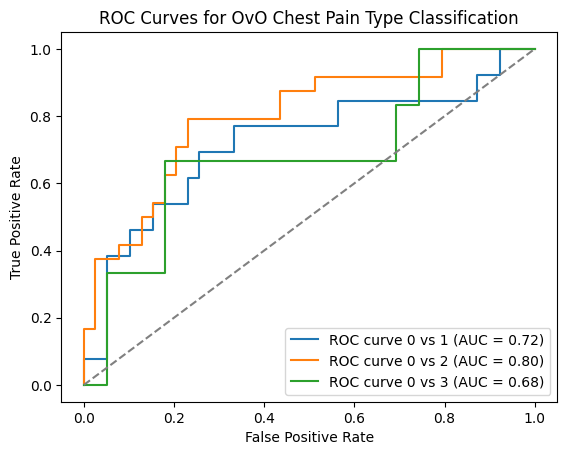

ROC-AUC Scores: {'0 vs 1': 0.719921104536489, '0 vs 2': 0.7991452991452991, '0 vs 3': 0.6837606837606838}
Best distinguished pair (OvO approach): 0 vs 2


In [8]:
roc_auc_scores = {}

pairs = [(0, 1), (0, 2), (0, 3)]

features = ['age', 'sex', 'trtbps', 'chol', 'restecg', 'thalach']

for pair in pairs:
    subset = data[data['cp'].isin(pair)]
    subset['target'] = (subset['cp'] == pair[1]).astype(int)

    X = subset[features]
    y = subset['target']

    # splitting the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

    # Logistic Regression
    model = LogisticRegression(max_iter=1000, random_state=42)
    model.fit(X_train, y_train)

    y_prob = model.predict_proba(X_test)[:, 1]
    roc_auc = roc_auc_score(y_test, y_prob)
    roc_auc_scores[f"{pair[0]} vs {pair[1]}"] = roc_auc

    # plotting the ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f"ROC curve {pair[0]} vs {pair[1]} (AUC = {roc_auc:.2f})")

# ROC plot
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for OvO Chest Pain Type Classification")
plt.legend(loc="lower right")
plt.show()

# finding the best pair
best_pair = max(roc_auc_scores, key=roc_auc_scores.get)
print(f"ROC-AUC Scores: {roc_auc_scores}")
print(f"Best distinguished pair (OvO approach): {best_pair}")